# Import Necessary Libraries Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

# Load Boston Housing Data

In [3]:
housing_datasets = pd.read_csv('../input/boston-housing/housing.data', delim_whitespace=True, header = None)

In [4]:
housing_datasets.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
columns_names = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [6]:
housing_datasets.columns = columns_names

# Exploratory Data Analysis: 

### In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
<img src="https://fiverr-res.cloudinary.com/images/t_main1,q_auto,f_auto,q_auto,f_auto/gigs/125813460/original/b181b396fd3ab88aa130a856f09817a958e29294/do-exploratory-data-analysis.png" alt="EDA">

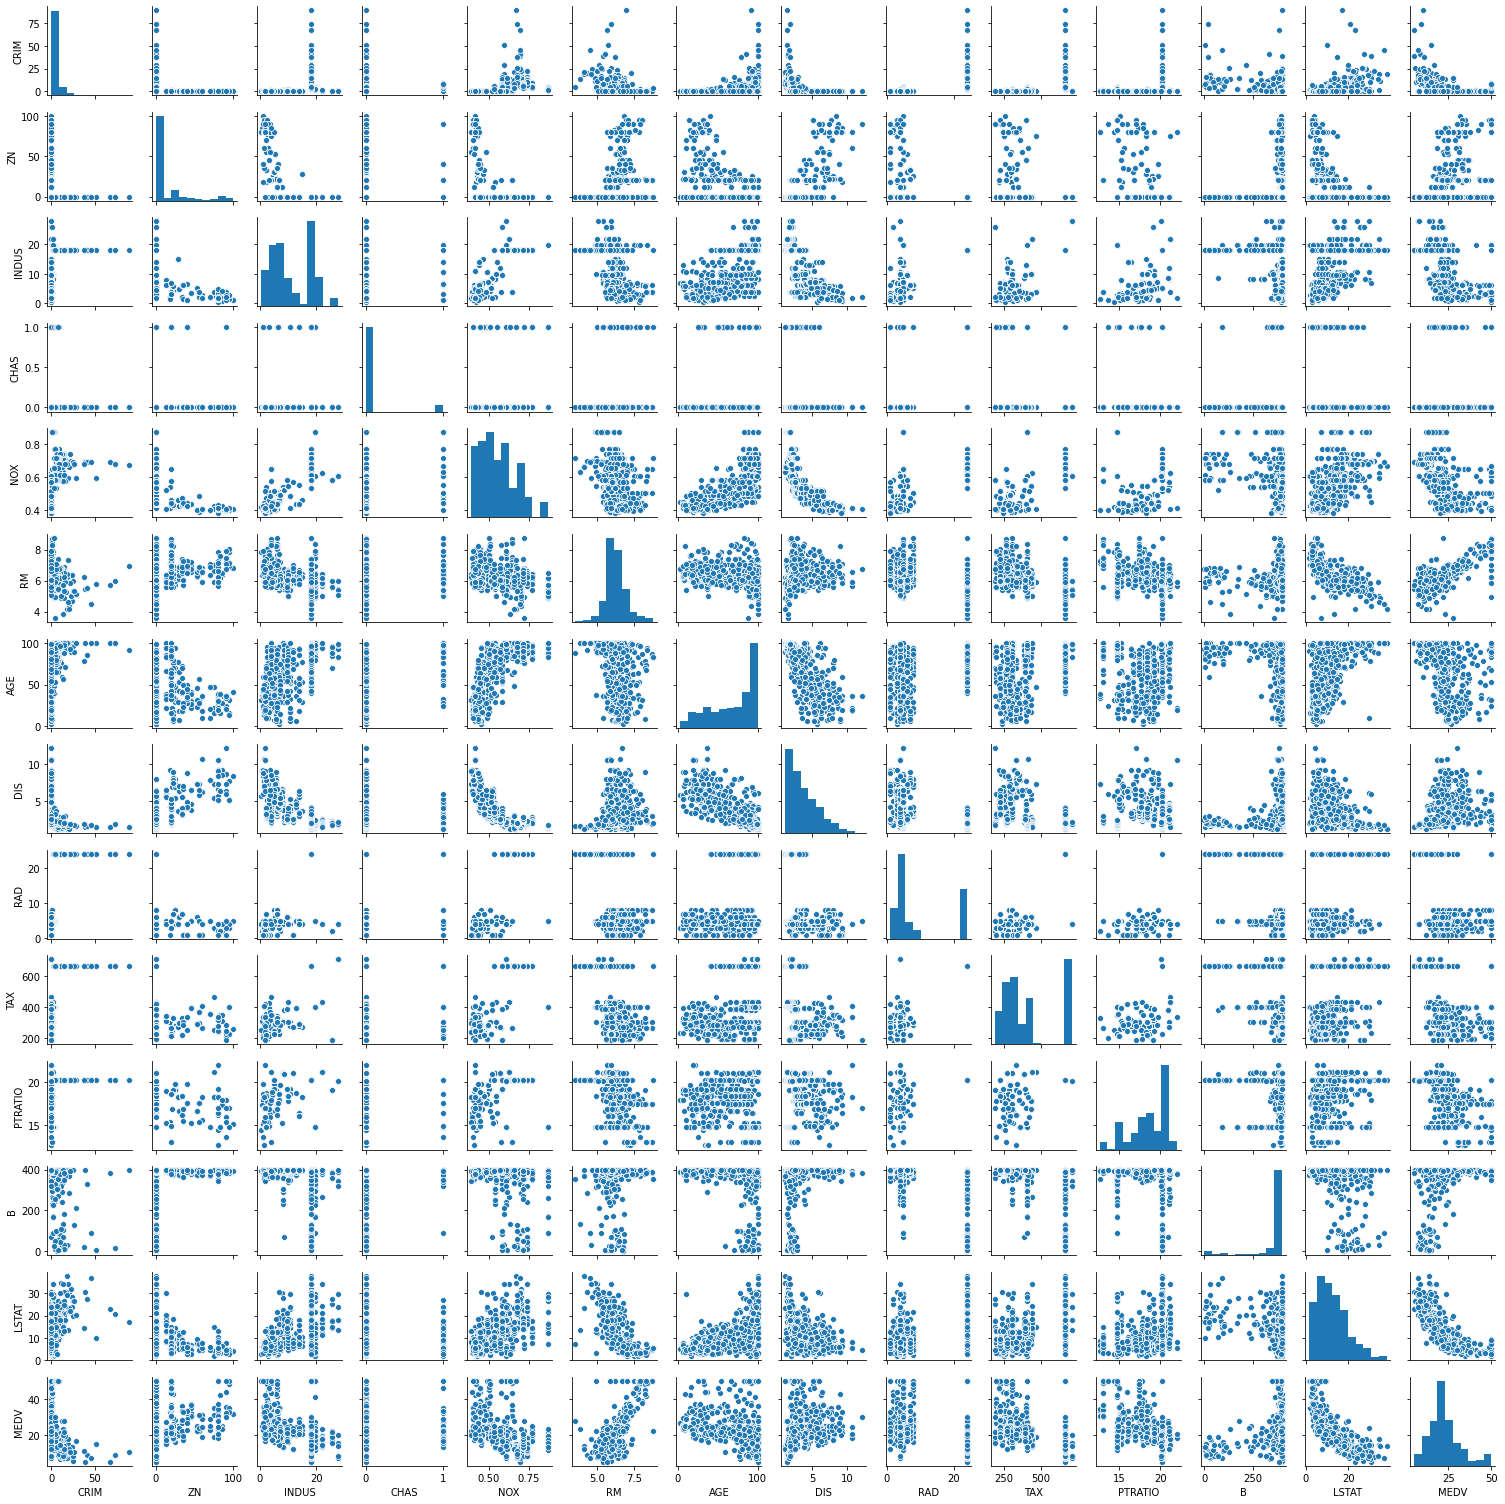

In [7]:
sns.pairplot(housing_datasets, size=1.5)
plt.tight_layout()
plt.show()

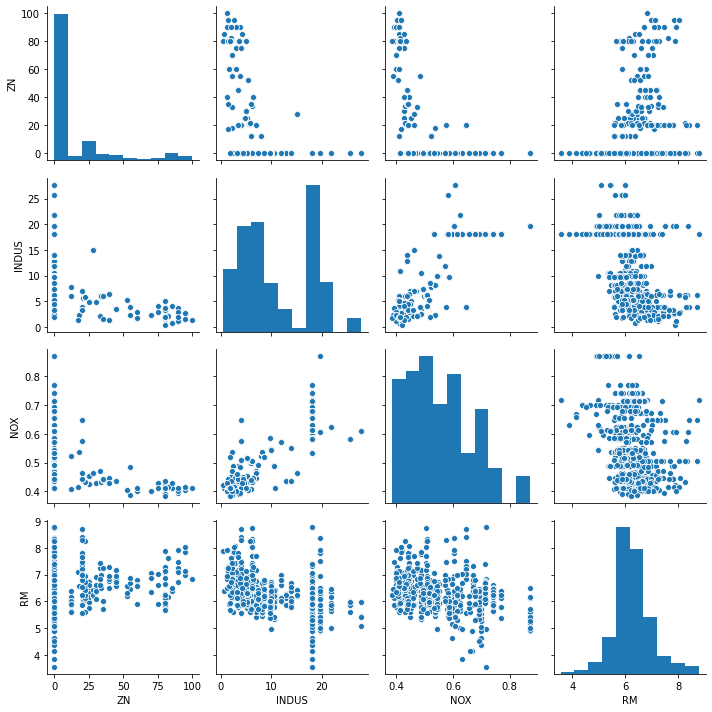

In [8]:
column_analysis = ['ZN', 'INDUS','NOX', 'RM']
sns.pairplot(housing_datasets[column_analysis],size = (2.5))
plt.tight_layout()
plt.show()

# Correlation

In [9]:
housing_datasets.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


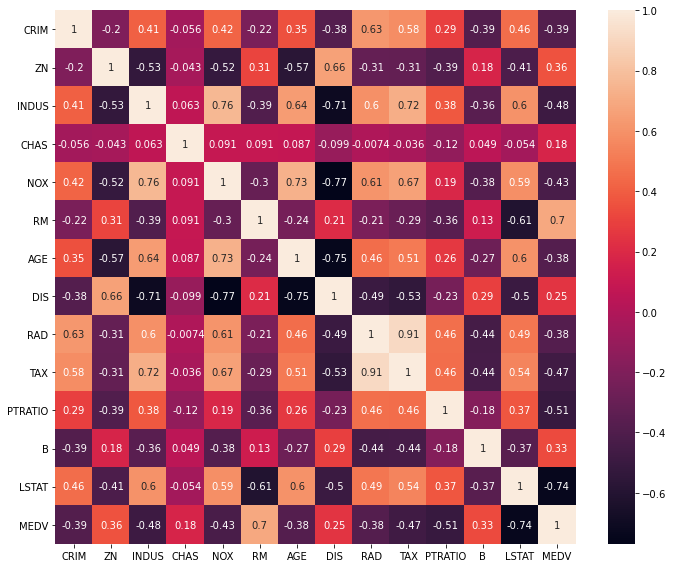

In [10]:
plt.figure(figsize = (10, 8))
sns.heatmap(housing_datasets.corr(), annot=True)
plt.tight_layout()
plt.show()

# Linear Regression

### Create Linear Regression Model

In [11]:
model = LinearRegression()

In [12]:
independent_attribute = housing_datasets['RM'].values.reshape(-1, 1)
dependent_attribute = housing_datasets['MEDV'].values

In [13]:
model.fit(independent_attribute, dependent_attribute)

LinearRegression()

In [14]:
model.intercept_

-34.67062077643857

In [15]:
model.coef_

array([9.10210898])

# Visualize the model

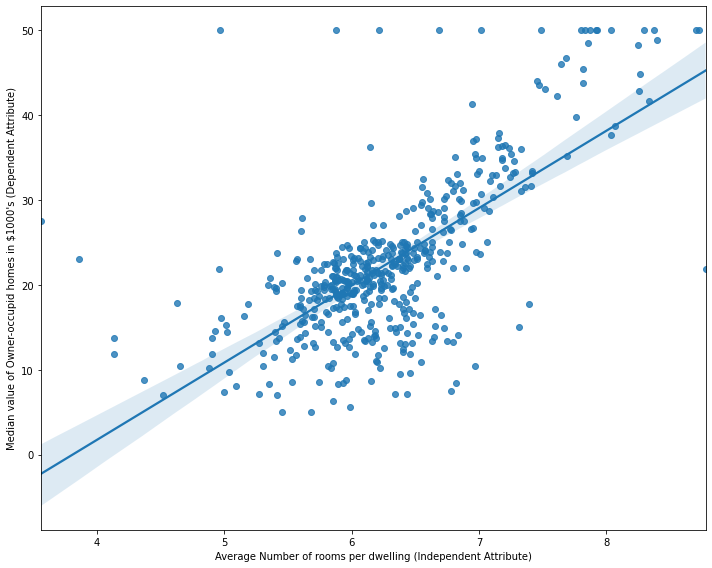

In [16]:
plt.figure(figsize=(10, 8))
sns.regplot(independent_attribute, dependent_attribute)
plt.xlabel('Average Number of rooms per dwelling (Independent Attribute)')
plt.ylabel('Median value of Owner-occupid homes in $1000\'s (Dependent Attribute)')
plt.tight_layout()
plt.show()

# Join Plot

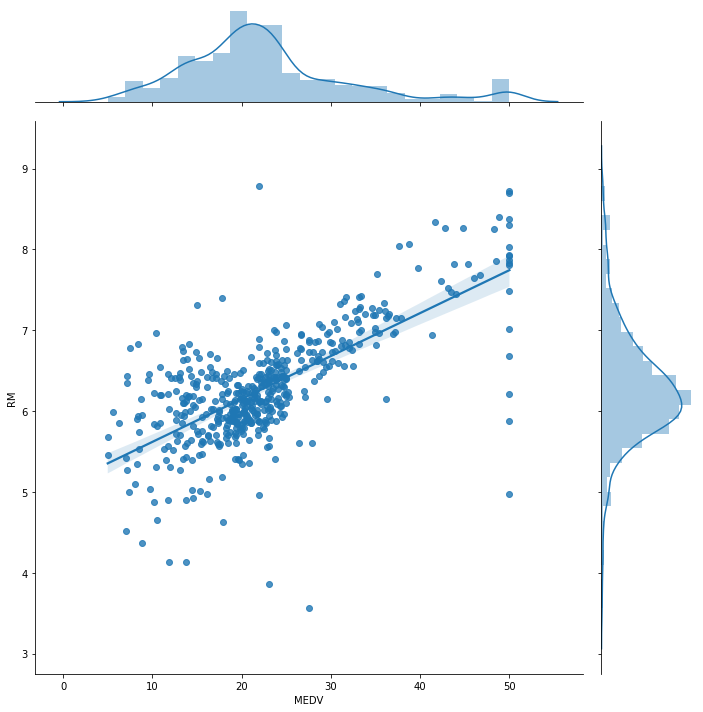

In [17]:
sns.jointplot(x = 'MEDV', y = 'RM', data = housing_datasets, kind = 'reg', size = 10)
plt.show()

Text(0.5, 1.0, 'Bubble Plot with Colors: Matplotlib')

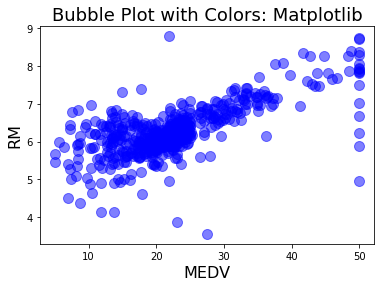

In [18]:
plt.scatter('MEDV', 'RM',
             s=100,
             c='blue',
             alpha=0.5, data=housing_datasets)
plt.xlabel("MEDV", size=16)
plt.ylabel("RM", size=16)
plt.title("Bubble Plot with Colors: Matplotlib", size=18)

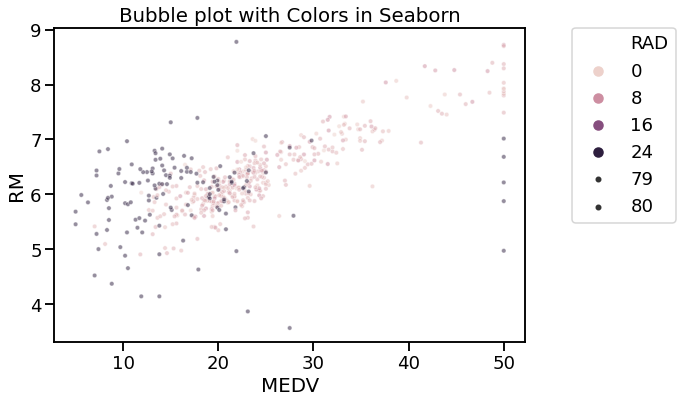

In [19]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x='MEDV', 
                y='RM',
                size=80,
                sizes=(20,500),
                alpha=0.5,
                hue="RAD",
                c='blue',
                data=housing_datasets)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.1, 1),borderaxespad=0)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.01, 0.54),  borderaxespad=0.)
plt.xlabel("MEDV")
plt.ylabel("RM")
plt.title("Bubble plot with Colors in Seaborn")
plt.tight_layout()
plt.show()

In [20]:
import plotly.graph_objects as go

import pandas as pd

# load dataset
df = housing_datasets

# create figure
fig = go.Figure()

# Add surface trace
fig.add_trace(go.Surface(z=df.values.tolist(), colorscale="Viridis"))

# Update plot sizing
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
)

# Update 3D scene options
fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction = "left",
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="3D Surface",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="Heatmap",
                    method="restyle"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Trace type:", showarrow=False,
                             x=0, y=1.08, yref="paper", align="left")
    ]
)

fig.show()

# Clustering Using Plotly

In [21]:
import plotly.graph_objects as go

# Generate dataset
import numpy as np
np.random.seed(1)

x0 = housing_datasets['MEDV']
y0 = housing_datasets['RM']
x1 = housing_datasets['CHAS']
y1 = housing_datasets['RM']
x2 = housing_datasets['CRIM']
y2 = housing_datasets['RM']

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(
        x=x0,
        y=y0,
        mode="markers",
        marker=dict(color="DarkOrange")
    )
)

fig.add_trace(
    go.Scatter(
        x=x1,
        y=y1,
        mode="markers",
        marker=dict(color="Crimson")
    )
)

fig.add_trace(
    go.Scatter(
        x=x2,
        y=y2,
        mode="markers",
        marker=dict(color="RebeccaPurple")
    )
)

# Add buttons that add shapes
cluster0 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x0), y0=min(y0),
                            x1=max(x0), y1=max(y0),
                            line=dict(color="DarkOrange"))]
cluster1 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x1), y0=min(y1),
                            x1=max(x1), y1=max(y1),
                            line=dict(color="Crimson"))]
cluster2 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x2), y0=min(y2),
                            x1=max(x2), y1=max(y2),
                            line=dict(color="RebeccaPurple"))]

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="None",
                     method="relayout",
                     args=["shapes", []]),
                dict(label="Cluster 0",
                     method="relayout",
                     args=["shapes", cluster0]),
                dict(label="Cluster 1",
                     method="relayout",
                     args=["shapes", cluster1]),
                dict(label="Cluster 2",
                     method="relayout",
                     args=["shapes", cluster2]),
                dict(label="All",
                     method="relayout",
                     args=["shapes", cluster0 + cluster1 + cluster2])
            ],
        )
    ]
)

# Update remaining layout properties
fig.update_layout(
    title_text="Highlight Clusters",
    showlegend=False,
)

fig.show()